
There are 4 questions, with points weighting given in the question. Write Python code to solve each question.

Points will be deducted for 

- Functions or classes without `docstrings`
- Grossly inefficient or redundant code
- Excessively verbose code
- Use of *magic* numbers

Partial credit may be given for incomplete or wrong answers but not if you do not attempt the question.

**IMPORTANT**

- This is an **open book** exam meant to evaluate fluency with linear algebra and optimization Python
- Use a stopwatch to record the time you took to complete the exam in the cell below **honestly**:
    - Under 2 hours - No penalty
    - Between 2-3 hours - 5 points penalty
    - More than 3 hours or **no time reported** - 10 points penalty
- Upload the notebook to Sakai when done

**Honor Code**: You agree to follow the Duke Honor code when taking this exam.

**Self-reported time taken**: It is your responsibility to time your exam.

<font color=red>Fill in total time in hours and minutes in the cell below</font>

1 hr 59 min 45 sec

In [159]:
import re
import scipy.linalg as la
import numpy as np
import sys
import pandas as pd
from collections import Counter

**1**. (20 points)

In school, to help remember when the spelling should be "ei" or "ie", students are often taught the rule "i before e except after c". For example, "piece" and "conceive" fit this rule.

- Find all occurrences of words in the book `alice.txt` that violate this rule (10 points)
- Make a table of how often each such word occurs in decreasing order of the count (10 points)

First, we read in the file

In [2]:
with open('alice.txt') as f:
    alice = f.read()

Next, find all words with an "ei" sequence and all words with a "cei" sequence. We only want to keep the words with a "ei" sequence if they are not in the "cei" list as well. I'm not sure if this is desired from the problem, but I'll also find words that have a "cie" sequence because I suppose that breaks the rule too

In [157]:
all_ei = re.findall(pattern = "\w*ei\w*", string = alice)
all_cei = re.findall(pattern = "\w*cei\w*", string = alice)
all_cie = re.findall(pattern = "\w*cie\w*", string = alice)
violations = [word for word in all_ei if word not in all_cei]
violations += all_cie
violations

['either',
 'either',
 'either',
 'either',
 'their',
 'either',
 'theirs',
 'being',
 'being',
 'height',
 'being',
 'height',
 'height',
 'height',
 'their',
 'their',
 'neither',
 'seeing',
 'either',
 'neither',
 'their',
 'their',
 'their',
 'their',
 'either',
 'their',
 'their',
 'their',
 'either',
 'fancied']

Now, we'll make the requested table

In [172]:
counts = Counter(violations)
df = pd.DataFrame(data = Counter(violations).most_common(len(counts)), columns = ["Term", "Count"])
df

,Term,Count
0,their,10
1,either,8
2,height,4
3,being,3
4,neither,2
5,theirs,1
6,seeing,1
7,fancied,1


**2**. (20 points)

A grayscale figure of a Mandelbrot set is loaded for you.

- Compress the figure by reconstructing a rank k version, where is k is the number of singular values > 1e-9 (5 points)
- Calculate the Frobenius norm of the difference between the original and reconstructed image (5 points)
- Calculate the number of bytes needed to store the original image and the data needed to reconstruct the rank k image (5 points)
- What is the dimension of the null space of the reconstructed rank k image? (5 points)

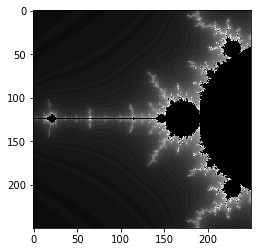

In [25]:
from skimage import color, io
import matplotlib.pyplot as plt
%matplotlib inline

img = color.rgb2gray(color.rgba2rgb(io.imread('mandelbrot-250x250.png')))
plt.imshow(img, cmap='gray')
pass

I will interpret the first part of the question to mean that I should select all singular values that are greater than 1e-9.

In [41]:
# Compress the figure by constructing a rank k version, where k is the number of singular values
U, s, Vt = la.svd(img, full_matrices = False)
k = sum(s > 1e-9)
low_rank = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]
low_rank

array([[0.01841647, 0.01841647, 0.01841647, ..., 0.05199922, 0.05199922,
        0.06291569],
       [0.01841647, 0.01841647, 0.01841647, ..., 0.06291569, 0.06291569,
        0.06291569],
       [0.01841647, 0.01841647, 0.01841647, ..., 0.06291569, 0.06291569,
        0.06291569],
       ...,
       [0.01841647, 0.01841647, 0.01841647, ..., 0.06291569, 0.06291569,
        0.06291569],
       [0.01841647, 0.01841647, 0.01841647, ..., 0.05199922, 0.05199922,
        0.06291569],
       [0.01841647, 0.01841647, 0.01841647, ..., 0.06291569, 0.05199922,
        0.05199922]])

Calculate the Frobenius norm of the difference between the original and reconstructed image. We see that the result is a very small error

In [42]:
np.linalg.norm(img - low_rank, ord='fro')

1.5910994059235727e-13

Calculate the number of bytes needed to store the original image and the data needed to reconstruct the rank k image

In [128]:
img.itemsize

8

Above, we see that each element of the img array takes 8 bytes to store. Therefore, the size of the entire array can roughly be calculated as num_rows x num_cols x 8. I'll also show below that there's some overhead associated with the storage

In [129]:
# Calculating using formula above
img.itemsize * img.shape[0] * img.shape[1]

500000

In [130]:
# Asking Python for the size of img, showing some overhead
sys.getsizeof(img)

500112

The low rank matrix only has 137 linearly independent columns, so we can calculate its storage need as 8 x 137 (num singular values) x 250 (num rows)

In [133]:
low_rank.itemsize * low_rank.shape[0] * sum(s > 1e-9)

274000

The dimension of the nullspace of the low rank approximation is equal to the rank of the original image - the number of singular values used to construct the low rank approximation

In [52]:
img.shape[0] - k

113

**3**. (20 points)

Let the columns of $A$ represent the basis vectors for a plane  in $\mathbb{R}^3$

$$
A = \pmatrix{1 & 2\\2 & 3\\3 & 4}
$$

- Construct a matrix $P$ that projects a vector $v \in \mathbb{R}^3$ onto this plane (5 points)
- Find the vector on the plane that is closes to the vector $\pmatrix{3\\4\\6}$ (5 points)
- Let  $v = \pmatrix{3\\4\\6}$. Find the coordinates of $\text{proj}_A v$ with respect to the basis vectors of the plane (5 points)
- Find the distance between $\text{proj}_A v$ and $v$ using projection (5 points)

Find projection matrix as P = $A(A^TA)^{-1}A^T$

In [57]:
A = np.array([[1, 2], [2, 3], [3, 4]])
P = A @ np.linalg.inv(A.T @ A) @ A.T
P

array([[ 0.83333333,  0.33333333, -0.16666667],
       [ 0.33333333,  0.33333333,  0.33333333],
       [-0.16666667,  0.33333333,  0.83333333]])

We can find the vector on the plane that is closest to the vector (3 4 6) by projecting the given vector onto the plane, using P

In [61]:
v = np.array([3, 4, 6])
v_proj = P @ v
v_proj

array([2.83333333, 4.33333333, 5.83333333])

Find the coordinates of $\text{proj}_A v$ with respect to the basis vectors of the plane

In [76]:
coords = la.lstsq(A, v_proj)[0]
coords

array([0.16666667, 1.33333333])

In [77]:
# Verify that coordinates * basis give desired vector
A @ coords.reshape(2, 1)

array([[2.83333333],
       [4.33333333],
       [5.83333333]])

Find the distance between $\text{proj}_A v$ and v using projection

In [78]:
np.linalg.norm(v - v_proj)

0.4082482904638681

**4** (30 points)

Given the function $f(x) = x^3 - 5x^2 + x + 1$,

- Perform a single quadratic interpolation starting with the points (0, 2, 5) and return the next bracket (10 points)
- Plot the function and the quadratic interpolation showing the interpolated points for $x \in (-1, 6)$ (5 points)
- Find a local minimum using the newton method starting at the point x=4 with a tolerance of $10^{-4}$ for $\delta x$. Return the value of $x$ and $f(x)$ at that point (10 points)
- Find all roots of the function using the companion matrix method (5 points)

For the optimization problems, stop when a tolerance of $10^{-4}$ is reached for $x$. Do not use any library functions from `scipy.optimize` or `scipy.interpolate` or `np.root` (you can use for checking but not for solving)

First, we define the given function

In [79]:
def f(x):
    """Returns function value, given a numeric input, x"""
    return x ** 3 - 5 * x ** 2 + x + 1

Next, we solve for the equation of the parabola, which takes the form of $y = ax^2 + bx + c$

In [112]:
x0 = np.array([0, 2, 5])
y0 = f(x0)
X = np.c_[x0 ** 2, x0, np.ones(len(x0))]
soln = np.linalg.solve(X, y0)
soln

array([ 2., -9.,  1.])

The next point is given by -b / 2a

In [114]:
next_pt = -soln[1] / (2 * soln[0])
next_pt

2.25

This new point leads to a next bracket of x = (2, 2.25, 5). We can solve for the next parabola

In [118]:
x1 = np.array([2, 2.5, 5])
y1 = f(x1)
X1 = np.c_[x1 ** 2, x1, np.ones(len(x1))]
soln1 = np.linalg.solve(X1, y1)
soln1

array([  4.5, -26.5,  26. ])

Now, we can plot the function along with the two parabola, one belonging to the original bracket and one belonging to the new bracket

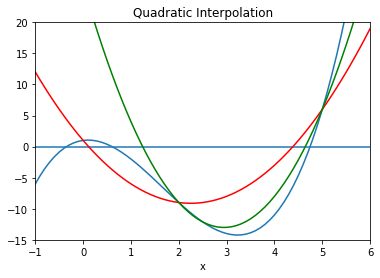

In [119]:
# Set-up plot
x = np.arange(-10,10, 0.1);
plt.plot(x, f(x))
plt.xlim(-1, 6)
plt.ylim(-15, 20)
plt.xlabel('x')
plt.axhline(0)
plt.title("Quadratic Interpolation")

# Plot first bracket
y_quad1 = soln[0] * x**2 + soln[1] * x + soln[2]
plt.plot(x, y_quad1, color = 'r')

# Plot 2nd parabola
y_quad2 =  soln1[0] * x**2 + soln1[1] * x + soln1[2]
plt.plot(x, y_quad2, color = 'g')
pass

To implement Newton's method, I'll first define functions for the first and second derivatives of the function

In [120]:
def grad(x):
    """Returns first derivative of function"""
    return 3 * x**2 - 10 * x + 1

def grad2(x):
    """Returns second derivative of function"""
    return 6*x - 10

Now, we use Newton's method to find a minimum and display the result

In [123]:
def newton(x0, tol = 1e-4):
    """Use Newton's method to find minimum of function"""
    x = x0
    while (grad(x) / grad2(x)) > tol:
        x = x - grad(x) / grad2(x)
    return x, f(x)

In [124]:
newton(x0 = 4)

(3.2301458435204404, -14.236233089835615)

Lastly, we find all roots of the function by creating a companion matrix and then finding its eigenvalues, which are the roots of the function

In [126]:
C = np.array([[5, -1, -1],
            [1, 0, 0],
            [0, 1, 0]])
np.linalg.eigvals(C)

array([ 4.74482608,  0.60406814, -0.34889422])